In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/flights.csv'    
flights = pd.read_csv(url, sep = ',')
flights.head(10)

,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
4,5,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0
5,6,2013,1,1,554.0,-4.0,740.0,12.0,UA,N39463,1696,EWR,ORD,150.0,719,5.0,54.0
6,7,2013,1,1,555.0,-5.0,913.0,19.0,B6,N516JB,507,EWR,FLL,158.0,1065,5.0,55.0
7,8,2013,1,1,557.0,-3.0,709.0,-14.0,EV,N829AS,5708,LGA,IAD,53.0,229,5.0,57.0
8,9,2013,1,1,557.0,-3.0,838.0,-8.0,B6,N593JB,79,JFK,MCO,140.0,944,5.0,57.0
9,10,2013,1,1,558.0,-2.0,753.0,8.0,AA,N3ALAA,301,LGA,ORD,138.0,733,5.0,58.0


In [2]:
url = 'https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/weather.csv'
weather = pd.read_csv(url, sep = ',')
weather = weather.drop(columns = "year").drop(columns = "origin").drop(columns = "Unnamed: 0")
weather.head(10)

,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
0,1.0,1.0,0.0,37.04,21.92,53.97,230.0,10.35702,11.918651,0.0,1013.9,10.0
1,1.0,1.0,1.0,37.04,21.92,53.97,230.0,13.80936,15.891535,0.0,1013.0,10.0
2,1.0,1.0,2.0,37.94,21.92,52.09,230.0,12.65858,14.567241,0.0,1012.6,10.0
3,1.0,1.0,3.0,37.94,23.00,54.51,230.0,13.80936,15.891535,0.0,1012.7,10.0
4,1.0,1.0,4.0,37.94,24.08,57.04,240.0,14.96014,17.215830,0.0,1012.8,10.0
5,1.0,1.0,6.0,39.02,26.06,59.37,270.0,10.35702,11.918651,0.0,1012.0,10.0
6,1.0,1.0,7.0,39.02,26.96,61.63,250.0,8.05546,9.270062,0.0,1012.3,10.0
7,1.0,1.0,8.0,39.02,28.04,64.43,240.0,11.50780,13.242946,0.0,1012.5,10.0
8,1.0,1.0,9.0,39.92,28.04,62.21,250.0,12.65858,14.567241,0.0,1012.2,10.0
9,1.0,1.0,10.0,39.02,28.04,64.43,260.0,12.65858,14.567241,0.0,1011.9,10.0


 # 1. Cредняя задержка рейсов по месяцам и зависимость от осадков

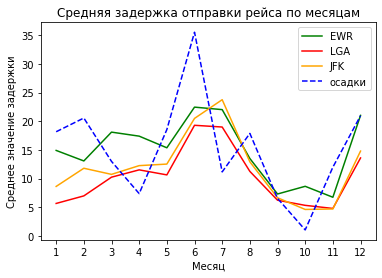

In [3]:
plt.plot(flights[flights['origin']=='EWR'].groupby('month')['dep_delay'].mean(),color='green',label='EWR')
plt.plot(flights[flights['origin']=='LGA'].groupby('month')['dep_delay'].mean(),color='red',label='LGA')
plt.plot(flights[flights['origin']=='JFK'].groupby('month')['dep_delay'].mean(),color='orange',label='JFK')
W=(weather.groupby('month')['precip'].mean())*5000
plt.plot(W,color='blue', ls='dashed', label='осадки')

plt.legend()
plt.title("Средняя задержка отправки рейса по месяцам")
plt.xlabel("Месяц")
plt.ylabel("Среднее значение задержки")
plt.xticks(np.arange(1,13))
plt.show()

Вывод: Осадки играют важную роль в задержке рейсов. В зависимости от прогноза погоды стоит готовиться к бОльшим задержкам. Наибольшее время задержек приходится на лето, наименьшее - на осень.

# 2. Зависимость средней задержки от времени суток

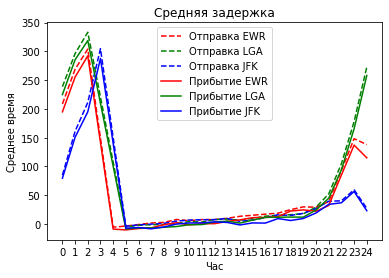

In [4]:
depE=flights[flights['origin']=='EWR'].groupby('hour')['dep_delay'].mean()
depL=flights[flights['origin']=='LGA'].groupby('hour')['dep_delay'].mean()
depJ=flights[flights['origin']=='JFK'].groupby('hour')['dep_delay'].mean()
arrE=flights[flights['origin']=='EWR'].groupby('hour')['arr_delay'].mean()
arrL=flights[flights['origin']=='LGA'].groupby('hour')['arr_delay'].mean()
arrJ=flights[flights['origin']=='JFK'].groupby('hour')['arr_delay'].mean()
plt.plot(depE,color='red',ls='dashed',label='Отправка EWR')
plt.plot(depL,color='green',ls='dashed',label='Отправка LGA')
plt.plot(depJ,color='blue',ls='dashed',label='Отправка JFK')
plt.plot(arrE,color='red',label='Прибытие EWR')
plt.plot(arrL,color='green',label='Прибытие LGA')
plt.plot(arrJ,color='blue',label='Прибытие JFK')
plt.xticks(np.arange(25))
plt.title("Средняя задержка")
plt.xlabel("Час")
plt.ylabel("Среднее время")
plt.legend()
plt.show()

Вывод: Наихудшее время - интервал с 22 до 5 часов, то есть ночное время. Возможные причины - темнота, усталость, меньшее количесиво персонала.

# 3. Зависимость от дальности полета.

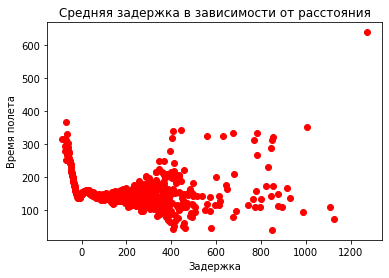

In [5]:
plt.plot(flights.groupby('arr_delay')['air_time'].mean(),'o',color='red',label='LGA')
plt.title("Средняя задержка в зависимости от расстояния")
plt.xlabel("Задержка")
plt.ylabel("Время полета")
plt.show()

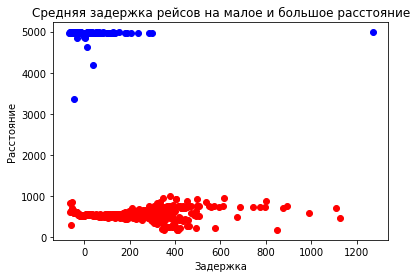

In [3]:
plt.plot(flights[flights['distance']<1000].groupby('arr_delay')['distance'].mean(),'o',color='red',label='LGA')
plt.plot(flights[flights['distance']>3000].groupby('arr_delay')['distance'].mean(),'o',color='blue',label='LGA')
plt.title("Средняя задержка рейсов на малое и большое расстояние")
plt.xlabel("Задержка")
plt.ylabel("Расстояние")
plt.show()

Вывод: При полетах на маленькие расстояния задержек больше, чем при полете на дальние, средняя задержках на дальних меньше.

# 4. Среднее значение задержки во всех аэропортах.

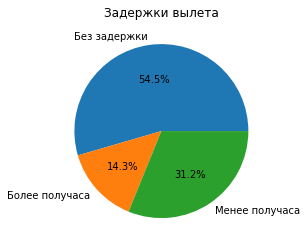

In [8]:
A=flights['dep_delay'].reset_index()
len0=len(A)
len1=len(A[A['dep_delay']<0])
len2=len(A[A['dep_delay']>30])
x=np.zeros(len0)
y=np.zeros(len0)
x[:len1]=100/len0
y[:len2]=100/len0
labels='Без задержки','Более получаса', 'Менее получаса'
plt.pie([x.sum(),y.sum(),100-x.sum()-y.sum()],labels=labels,autopct='%1.1f%%')
plt.title("Задержки вылета")
plt.show()

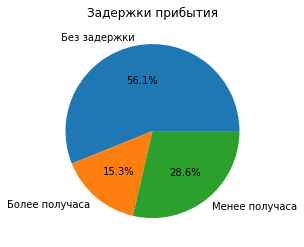

In [9]:
A=flights['arr_delay'].reset_index()
len0=len(A)
len1=len(A[A['arr_delay']<0])
len2=len(A[A['arr_delay']>30])
x=np.zeros(len0)
y=np.zeros(len0)
x[:len1]=100/len0
y[:len2]=100/len0
labels='Без задержки','Более получаса', 'Менее получаса'
plt.pie([x.sum(),y.sum(),100-x.sum()-y.sum()],labels=labels,autopct='%1.1f%%')
plt.title("Задержки прибытия")
plt.show()

Вывод: Распределение прибытий и задержек примерно одинаково. К сожалению, задержка есть почти у половины рейсов, и около 30% из них - более получаса.

# 5. Зависимость от влажности воздуха.

Text(0, 0.5, 'Задержка')

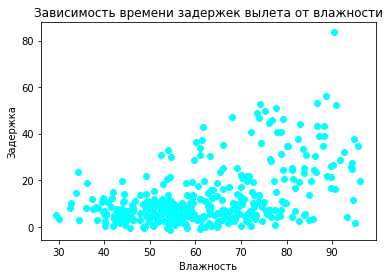

In [10]:
mer = flights.merge(weather)
plt.scatter(mer.groupby(['month','day'])['humid'].mean(), mer.groupby(['month','day'])['dep_delay'].mean()[0:500], color = 'aqua')
plt.title('Зависимость времени задержек вылета от влажности')
plt.xlabel('Влажность')
plt.ylabel('Задержка')


Вывод: Чем выше влажность, тем большее время задержки. Значит, влажность -  один из важных факторов, на который стоит обратить внимание.

# 6. Сравнение задержек в аэропортах

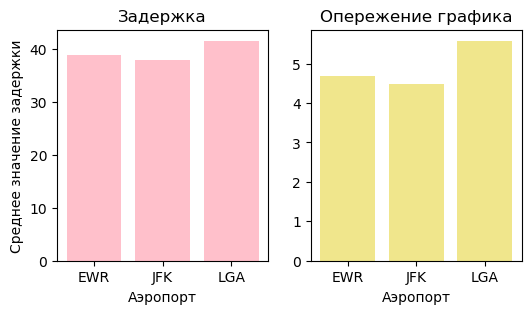

In [81]:
plt.figure(figsize=(6,3))
B=flights[flights.dep_delay > 0].groupby('origin')['dep_delay'].mean()
plt.subplot(1,2,1)
plt.bar(np.arange(3), B, color='pink')
plt.xticks(np.arange(3),  ('EWR','JFK','LGA'))
plt.title("Задержка")
plt.xlabel("Аэропорт")
plt.ylabel("Среднее значение задержки")
С=(flights[flights.dep_delay < 0].groupby('origin')['dep_delay'].mean())*(-1)
plt.subplot(1,2,2)
plt.bar(np.arange(3), С, color='khaki')
plt.xticks(np.arange(3),  ('EWR','JFK','LGA'))
plt.title("Опережение графика")
plt.xlabel("Аэропорт")
plt.show()


Вывод: JFK - наиболее надежный аэропорт с наименьшими отклонениями от графика, LGA - чаще других опережает график, но и больше отстает. 

# 7. Наиболее надежные и наиболее проблемные перевозчики.

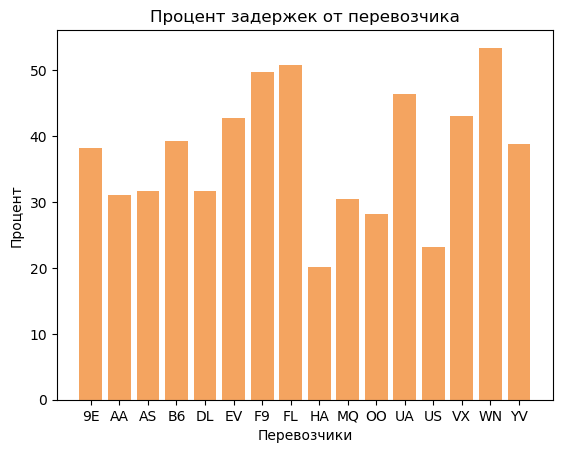

In [78]:
fl_delay=flights[flights.dep_delay>0]
A1=pd.DataFrame(flights.groupby([flights.carrier]).size().reset_index(name='Total_Count'))
A2=pd.DataFrame(fl_delay.groupby([fl_delay.carrier]).size().reset_index(name='Count'))
fl_merged = pd.merge(A1, A2, on=['carrier'])
fl_merged['Percent'] = (fl_merged.Count/fl_merged.Total_Count)*100
plt.bar(np.arange(len(fl_merged.carrier)), fl_merged.Percent, color="sandybrown")
plt.xlabel('Перевозчики')
plt.ylabel('Процент')
plt.title('Процент задержек от перевозчика')
plt.xticks(np.arange(len(fl_merged.carrier)), fl_merged.carrier)
plt.show()

Вывод: На этом графике мы видим, какие перевозчики более ответственны (HA, US), а на какие нужно обратить внимание и постараться уменьшить их задержки (WN, FL, F9).

# 8. Меняют ли праздничные дни показатели?

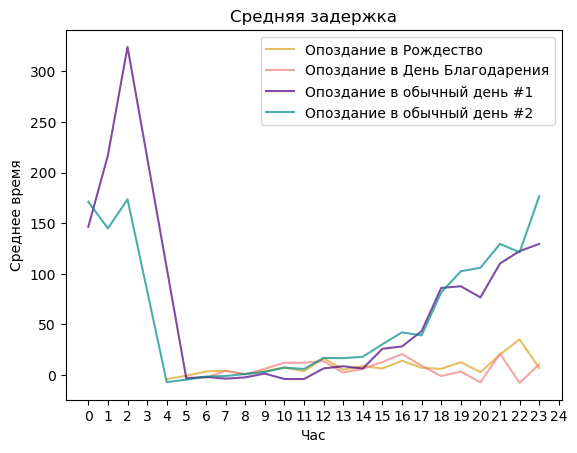

In [99]:
fl_dec=flights[flights.month==12]
fl_chr=fl_dec[fl_dec.day==25].groupby('hour')['dep_delay'].mean()
fl_jun=flights[flights.month==6]
fl_day=fl_jun[fl_jun.day==2].groupby('hour')['dep_delay'].mean()
fl_nov=flights[flights.month==11]
fl_thx=fl_nov[fl_nov.day==28].groupby('hour')['dep_delay'].mean()
fl_avg=flights[flights.month==8]
fl_day2=fl_avg[fl_avg.day==8].groupby('hour')['dep_delay'].mean()
plt.plot(fl_chr,color='goldenrod',alpha=0.7,label='Опоздание в Рождество')
plt.plot(fl_thx,color='lightcoral',alpha=0.7,label='Опоздание в День Благодарения')

plt.plot(fl_day,color='indigo',alpha=0.7,label='Опоздание в обычный день #1')
plt.plot(fl_day2,color='darkcyan',alpha=0.7,label='Опоздание в обычный день #2')
plt.xticks(np.arange(25))
plt.title("Средняя задержка")
plt.xlabel("Час")
plt.ylabel("Среднее время")
plt.legend()
plt.show()

Вывод: В праздничные дни задержка, в целом, меньше, чем в обычные дни. Возможно, в праздники меньше людей летают, возможно, в праздники компании более ответственно относятся к перевозкам. Более того, мы видим, что наибольшая разница вечером и ночью.

# 9. Влияние видимости на задержки.

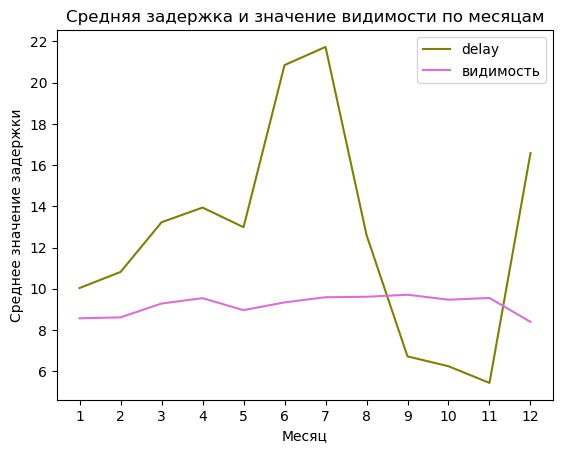

In [105]:
plt.plot(flights.groupby('month')['dep_delay'].mean(),color='olive',label='delay')
W=(weather.groupby('month')['visib'].mean())
plt.plot(W,color='orchid', label='видимость')
plt.legend()
plt.title("Средняя задержка и значение видимости по месяцам")
plt.xlabel("Месяц")
plt.ylabel("Среднее значение задержки")
plt.xticks(np.arange(1,13))
plt.show()

Видим, что в целом зависимость не наблюдается.
Но здесь данные сильно усреднены, возьмем какой-нибудь конкретный день, в который видимость менялась и попробуем проанализировать.

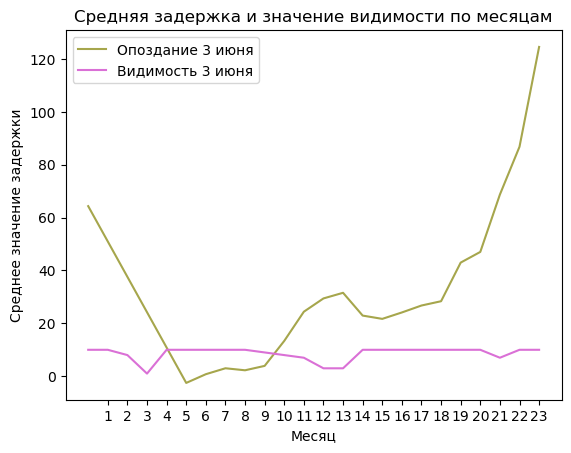

In [152]:
fl_jun=flights[flights.month==6]
fl_day=fl_jun[fl_jun.day==3].groupby('hour')['dep_delay'].mean()
w_jun=weather[weather.month==6.0]
w_day=w_jun[w_jun.day==3.0].groupby('hour')['visib'].mean()
plt.plot(fl_day,color='olive',alpha=0.7,label='Опоздание 3 июня')
plt.plot(w_day,color='orchid', label='Видимость 3 июня')
plt.legend()
plt.title("Средняя задержка и значение видимости по месяцам")
plt.xlabel("Месяц")
plt.ylabel("Среднее значение задержки")
plt.xticks(np.arange(1,24))
plt.show()

Вывод: здесь мы видим, что с ухудшением видимости с 10 до 14 часов, поднялось и время задержек. Но в целом, зависимость не такая явная. Таким образом, видимость - важный фактор, но совсем не основной.

# 10. Зависимость задержек от ветра.

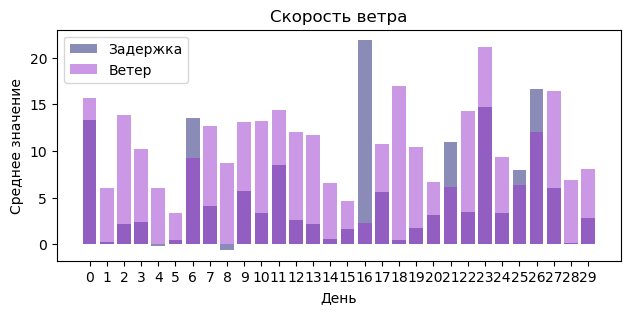

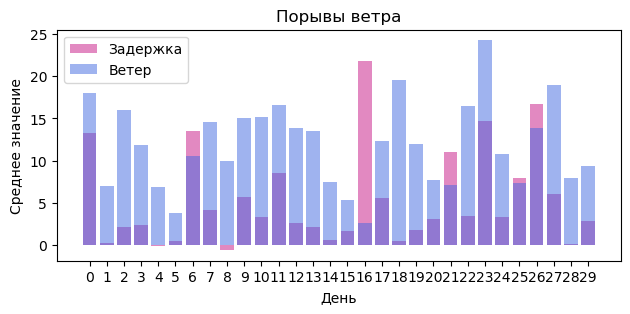

In [159]:
plt.figure(figsize=(16,3))
B=flights[flights.month ==11].groupby('day')['dep_delay'].mean()
W=weather[weather.month ==11].groupby('day')['wind_speed'].mean()
WG=weather[weather.month ==11].groupby('day')['wind_gust'].mean()

plt.subplot(1,2,1)
plt.bar(np.arange(30), B, alpha=0.5, color='midnightblue', label = 'Задержка')
plt.xticks(np.arange(30))
plt.ylabel("Среднее значение")
plt.bar(np.arange(30),W, alpha=0.5,color='darkorchid', label = 'Ветер')
plt.legend()
plt.xticks(np.arange(30))
plt.title("Скорость ветра")
plt.xlabel("День")

plt.figure(figsize=(16,3))
plt.subplot(1,2,2)
plt.bar(np.arange(30), B, alpha=0.5, color='mediumvioletred',  label = 'Задержка')
plt.xticks(np.arange(30))
plt.ylabel("Среднее значение")
plt.bar(np.arange(30),WG, alpha=0.5,color='royalblue', label = 'Ветер')
plt.xticks(np.arange(30))
plt.title("Порывы ветра")
plt.xlabel("День")
plt.legend()
plt.show()

Вывод: ни скорость ветра, ни порывы ветра существенно не влияют на задержки ресов. Я взяла конкретный месяц - ноябрь, чтобы внимательнее наблюдать зависимость.